<a href="https://colab.research.google.com/github/aishwarya2099/AAP2020/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [0]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion.csv.xlsx to fashion.csv (1).xlsx
User uploaded file "fashion.csv.xlsx" with length 9895 bytes


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.listdir()

['.config',
 '20232.jpg',
 '52044.jpg',
 '2675.jpg',
 '11575.jpg',
 '19718.jpg',
 '11111.jpg',
 '5808.jpg',
 '7135.jpg',
 '41661.jpg',
 '36501.jpg',
 '28863.jpg',
 'fashion.csv (1).xlsx',
 '33241.jpg',
 '32393.jpg',
 'drive',
 'fashion.csv.xlsx',
 '16334.jpg',
 '36733.jpg',
 '8941.jpg',
 '46020.jpg',
 '34400.jpg',
 '14007.jpg',
 '7763.jpg',
 '31172.jpg',
 '22757.jpg',
 '7307.jpg',
 '37285.jpg',
 'sample_data']

In [0]:
DATASET_PATH ="/content/drive/My Drive/images/"

In [0]:

df = pd.read_csv("fash.csv")

In [0]:
df['image'] = df.apply(lambda row: str(row['FileName']) + ".jpg", axis=1)

In [0]:
df

,FileName,Gender,Type,Position,Type2,Color,Temp,Year,Type3,Type4,image
0,52044,Unisex,Apparel,Topwear,Rain Jacket,Black,Summer,2012,NaN,Just Natural Unisex Black and Olive Reversible...,52044.jpg
1,2675,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Inkfruit Men's Zeppelin Black T-shirt,2675.jpg
2,5808,Women,Apparel,Topwear,Tops,Navy Blue,Summer,2011,Casual,Jealous 21 Women Navy Blue Top,5808.jpg
3,7135,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Casual,Urban Yoga Women's White T-shirt,7135.jpg
4,7307,Women,Apparel,Topwear,Tops,White,Summer,2011,Casual,UCB Women Sleeveless White Top,7307.jpg
5,7763,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,Inkfruit Men's Secret Behing Royal Blue Black ...,7763.jpg
6,8941,Men,Apparel,Topwear,Shirts,Blue,Fall,2011,Casual,Indigo Nation Men Reversible Bling Blue Shirts,8941.jpg
7,11111,Men,Apparel,Topwear,Shirts,White,Fall,2011,Formal,Indigo Nation Men Check White Shirts,11111.jpg
8,11575,Women,Apparel,Topwear,Kurtas,White,Summer,2011,Ethnic,W Women Printed White Kurtas,11575.jpg
9,12794,Women,Apparel,Topwear,Tshirts,Pink,Fall,2011,Casual,Nike Women White Print Pink Tshirts,12794.jpg


In [0]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+img

def load_image(img):
    return cv2.imread(img_path(img))

In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}

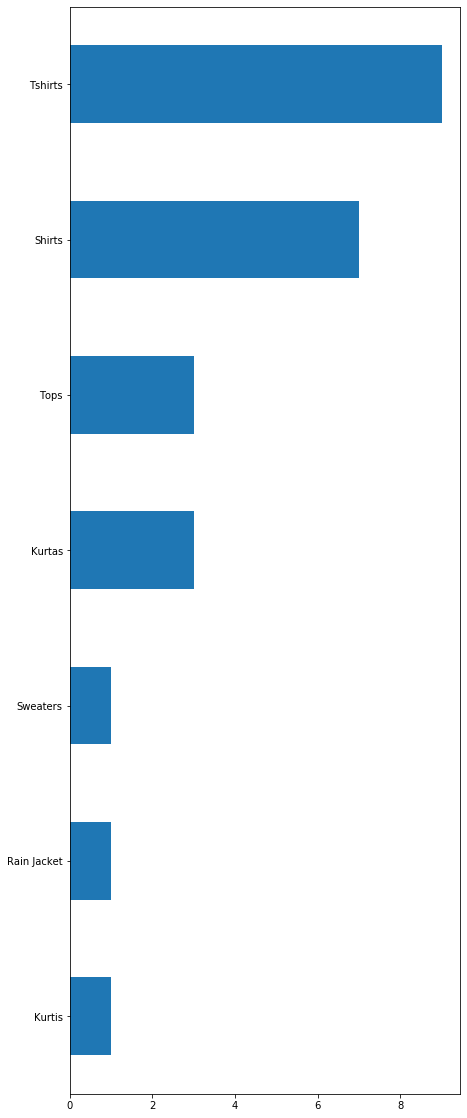

In [0]:
plt.figure(figsize=(7,20))
df.Type2.value_counts().sort_values().plot(kind='barh')

In [0]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

'1.15.0'

In [0]:
# Input Shape
 img_width=60
 img_height=80

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
94773248/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 3, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [0]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape

(2048,)

In [0]:
df

,FileName,Gender,Type,Position,Type2,Color,Temp,Year,Type3,Type4,image
0,52044,Unisex,Apparel,Topwear,Rain Jacket,Black,Summer,2012,NaN,Just Natural Unisex Black and Olive Reversible...,52044.jpg
1,2675,Men,Apparel,Topwear,Tshirts,Black,Summer,2011,Casual,Inkfruit Men's Zeppelin Black T-shirt,2675.jpg
2,5808,Women,Apparel,Topwear,Tops,Navy Blue,Summer,2011,Casual,Jealous 21 Women Navy Blue Top,5808.jpg
3,7135,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Casual,Urban Yoga Women's White T-shirt,7135.jpg
4,7307,Women,Apparel,Topwear,Tops,White,Summer,2011,Casual,UCB Women Sleeveless White Top,7307.jpg
5,7763,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011,Casual,Inkfruit Men's Secret Behing Royal Blue Black ...,7763.jpg
6,8941,Men,Apparel,Topwear,Shirts,Blue,Fall,2011,Casual,Indigo Nation Men Reversible Bling Blue Shirts,8941.jpg
7,11111,Men,Apparel,Topwear,Shirts,White,Fall,2011,Formal,Indigo Nation Men Check White Shirts,11111.jpg
8,11575,Women,Apparel,Topwear,Kurtas,White,Summer,2011,Ethnic,W Women Printed White Kurtas,11575.jpg
9,12794,Women,Apparel,Topwear,Tshirts,Pink,Fall,2011,Casual,Nike Women White Print Pink Tshirts,12794.jpg


[0.         0.         0.59265107 ... 0.         0.0973597  0.        ]


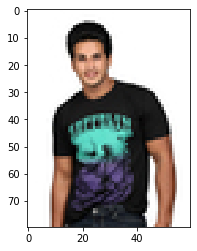

In [0]:
plt.imshow(cv2.cvtColor(load_image(df.iloc[1].image), cv2.COLOR_BGR2RGB))
print(emb)